**Airbnb** is an online marketplace that lets people rent out their properties or spare rooms to guests. Airbnb takes 3% commission of every booking from hosts, and between 6% and 12% from guests.   

Since the company launched in 2009, it’s grown from helping 21,000 guests a year find a place to stay to helping six million a year go on holiday, and currently lists a staggering 800,000 properties in 34,000 cities across 90 different countries.   

I will use the Kaggle New York City Airbnb Open Data dataset and try to build a neural network model with TensorFlow for prediction.   

The goal is to build a suitable machine learning model that will be able to predict prices of further accommodation data.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

/Users/tridoan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tridoan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tridoan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tridoan/opt/anaconda3/lib/python3.7/site-packages/tensorf

1.13.1


In [3]:
import os
os.getcwd()

'/Users/tridoan'

In [8]:
df=pd.read_csv('/Users/tridoan/Downloads/data/AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


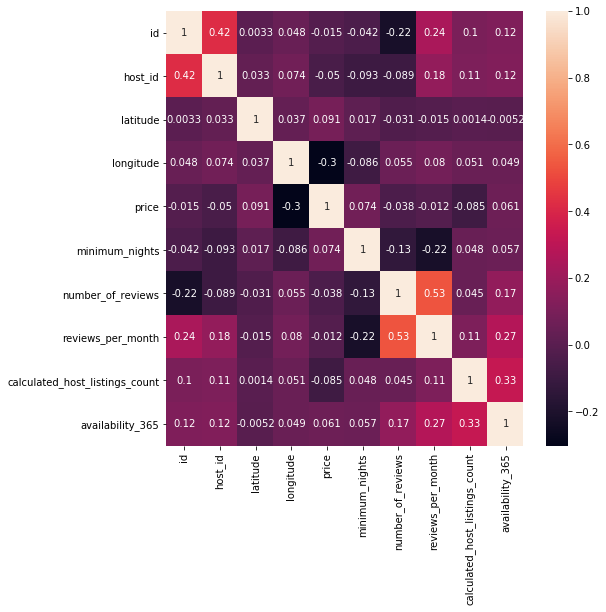

In [9]:
corr = df.corr(method='kendall')
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

Investigating the types of columns we're dealing with here.
Dropping unnecessary columns will make it easier to train our model. When I say unnecessary, I mean data that has low correlation with the model's prediction. Let's take a look at the types after dropping columns.

In [11]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
columns=['id','host_id','name','host_name','last_review','calculated_host_listings_count']
df=df.drop(columns,axis=1)
df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

In [13]:
df.dtypes

neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
availability_365         int64
dtype: object

By using the countplot we'll recieve the visual information about which neighbourhood group is the most popular for renting via AirBnb.

Text(0.5, 1.0, 'Neighbourhood')

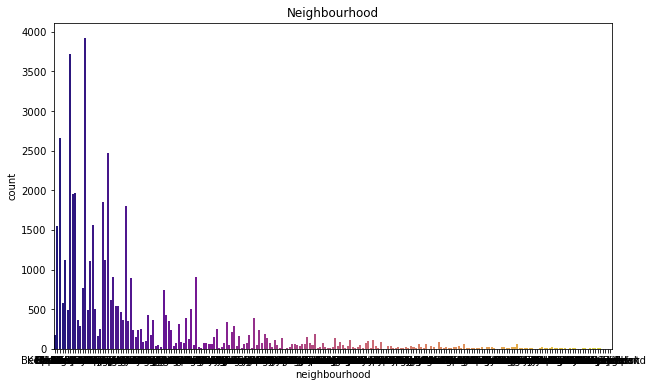

In [14]:
sns.countplot(df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Neighbourhood')

Let look at scatter plot

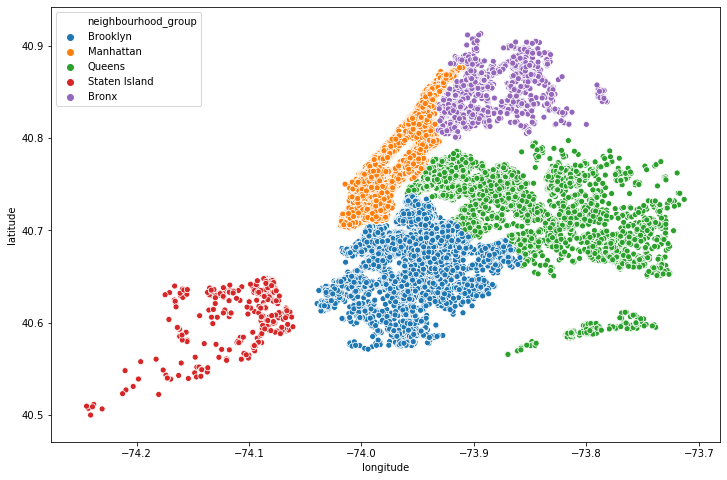

In [15]:
plot_dims=(12,8)
plt.figure(figsize=plot_dims)
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()